In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns

In [42]:
df = pd.read_csv('https://raw.githubusercontent.com/UC-MACSS/persp-analysis/master/assignments/exploratory-data-analysis/data/gss2012.csv')

In [43]:
#describe the dataset using describe
#lots of these are categorical variables so the means and description may not mean anything at all
df.describe()

,year,id,sibs,childs,age,size,eqwlth,closeblk,closewht,tvhours,...,black_traits,int_info_scale,tolerance,wtssall,age.f,mslm_spk.high,mslm_spk.yes,grass.legal,dem,science_quiz.f
count,1974.0,1974.000000,1971.000000,1971.000000,1969.000000,1974.000000,1324.000000,1294.000000,1297.000000,1298.000000,...,1245.000000,971.000000,1105.000000,1974.000000,1969.000000,1282.000000,1282.000000,1234.000000,1906.000000,508.000000
mean,2012.0,987.500000,3.658549,1.891933,48.193499,359.797366,3.616314,5.968315,6.730918,3.088598,...,0.053012,12.429454,10.449774,1.000507,48.193499,0.443838,44.383775,47.487844,0.366737,5.952756
std,0.0,569.989035,3.079752,1.674530,17.687113,1244.762836,2.083859,2.080681,1.925120,2.865100,...,1.639666,4.091469,3.653401,0.623714,17.687113,0.497030,49.702968,49.957097,0.482040,2.361286
min,2012.0,1.000000,0.000000,0.000000,18.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,-5.000000,0.000000,0.000000,0.396555,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.0,494.250000,2.000000,0.000000,33.000000,7.000000,2.000000,5.000000,5.000000,1.000000,...,-1.000000,10.000000,8.000000,0.823796,33.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,2012.0,987.500000,3.000000,2.000000,47.000000,29.000000,4.000000,5.000000,7.000000,2.000000,...,0.000000,13.000000,11.000000,0.823796,47.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,2012.0,1480.750000,5.000000,3.000000,61.000000,127.000000,5.000000,8.000000,9.000000,4.000000,...,1.000000,15.000000,14.000000,1.235694,61.000000,1.000000,100.000000,100.000000,1.000000,8.000000
max,2012.0,1974.000000,30.000000,8.000000,89.000000,8175.000000,7.000000,9.000000,9.000000,24.000000,...,6.000000,20.000000,15.000000,8.739876,89.000000,1.000000,100.000000,100.000000,1.000000,10.000000


str

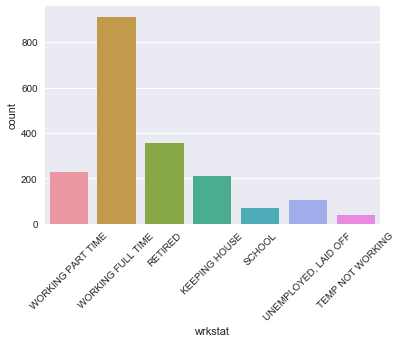

In [46]:
#Look at the working status of the sample GSS data for a starting point
x = sns.countplot(x = "wrkstat",
             data = df)

plt.xticks(rotation = 45)

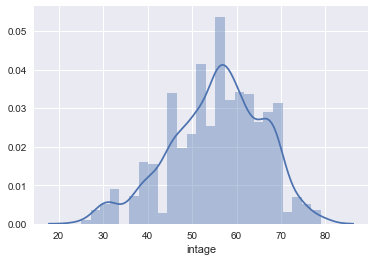

In [54]:
sns.distplot(df.intage)


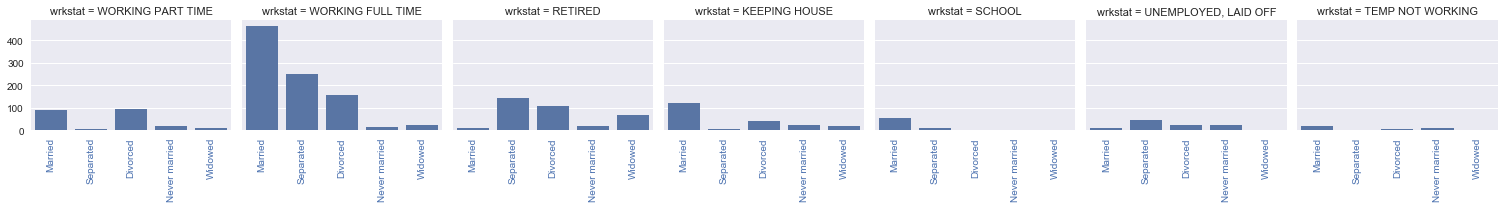

In [13]:
'''
Interesting to see where the majority of full time workers fall in 
terms of marital status, especially for full time workers
However, it looks like Working Full time Could posssibly be 
correlated based on some unobserved characteristics based on the chart
Also, based on the Retired wrkstat, it looks like many are seperated or 
divorced, could that be correlated with age?
'''
#Work status and Marital Status:
%matplotlib inline
work_mar_df = df.groupby(["wrkstat", "marital"]).size().reset_index()

work_mar_df.columns = ["wrkstat","marital","n"]

work_mar_plt = sns.FacetGrid(df, col = "wrkstat")

work_mar_plt = work_mar_plt.map(sns.countplot, "marital")

work_mar_plt = work_mar_plt.map(plt.xticks, rotation = 90)
#plt.xticks(rotation = 90)
work_mar_plt

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

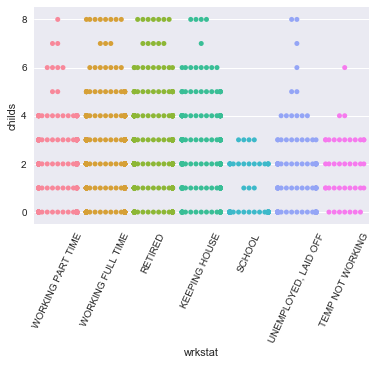

In [14]:
'''

Swarmplot from seabborn is like an a violin chart but with individual points
plotted based on an x categorical with an y continuous variable. 

plot here shows wrkstat and childs (number of children), however, it doesn't look
like this graph is very useful, may be better off with a boxplot to show 
distribution

'''


numchild_workstat = sns.swarmplot(x = 'wrkstat', y = 'childs', data = df)
plt.xticks(rotation = 65)

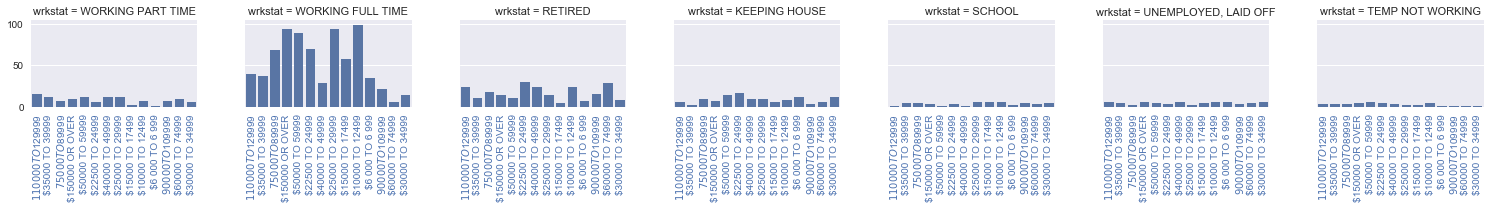

In [117]:
wrkstat_sal = sns.FacetGrid(df, col = "wrkstat")
wrkstat_sal = wrkstat_sal.map(sns.countplot,"income06")
wrkstat_sal.map(plt.xticks, rotation = 90)

#the working full time appears to create a bi-modal distribution, what is driving the gap between earners?

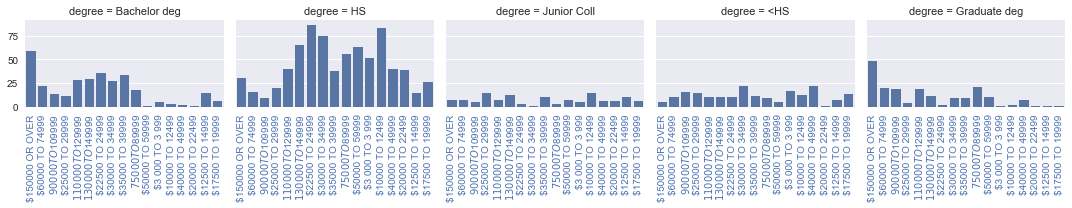

In [79]:
wrkstat_sal = sns.FacetGrid(df, col = "degree")
wrkstat_sal = wrkstat_sal.map(sns.countplot,"income06")
wrkstat_sal.map(plt.xticks, rotation = 90)

# What fields are the high wage earnings for HS degree in? How are they
#able to make so much with just a HS degree?


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

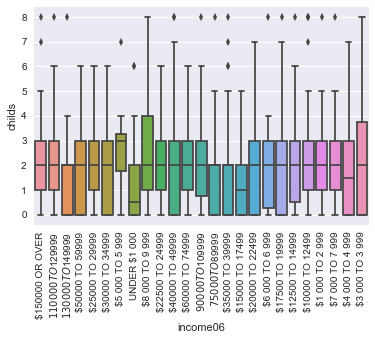

In [75]:
sns.boxplot(x = 'income06', y = 'childs', data =df)
plt.xticks(rotation = 90)

#What is driving the IQR for those making $8 - $9k?

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

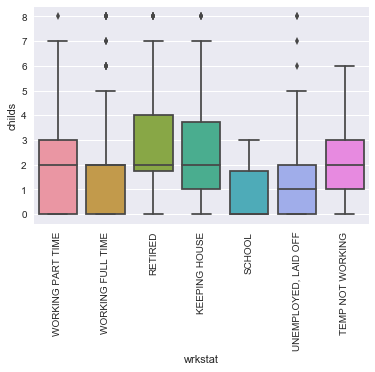

In [33]:
sns.boxplot(x = "wrkstat",
           y = 'childs',
           data = df)

plt.xticks(rotation = 90)

'''

most intersting thing about the boxplot is the Working Full Time and the
Working Part time distributions of number of children. It looks as 
though the working part time samples have a winder interquartile range than
the working full time. Keeping the house status doesn't account for if the other 
spouse works or not so might need to be explored.

'''

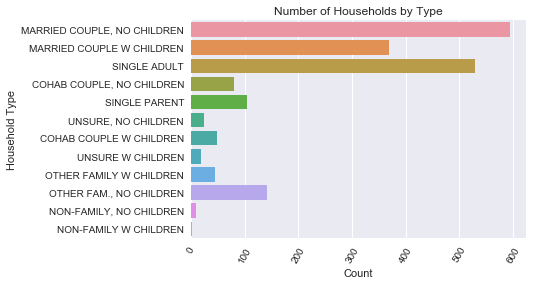

In [65]:
hhtypeplt = sns.countplot(y = "hhtype1", data = df)
plt.xticks(rotation =60)
hhtypeplt.set_xlabel("Count")
hhtypeplt.set_ylabel("Household Type")

hhtypeplt.set_title("Number of Households by Type")


#Why are there so many married couples with no kids, especially given the distribution of ages as indicated above?

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

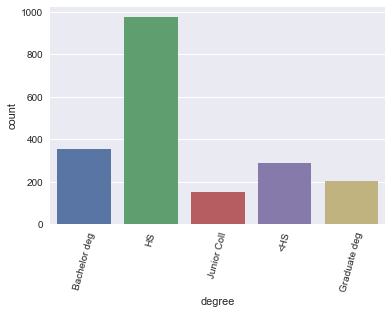

In [15]:
sns.countplot(x = "degree", data = df)
plt.xticks(rotation = 75)

#Majority of respondents have High School Degress

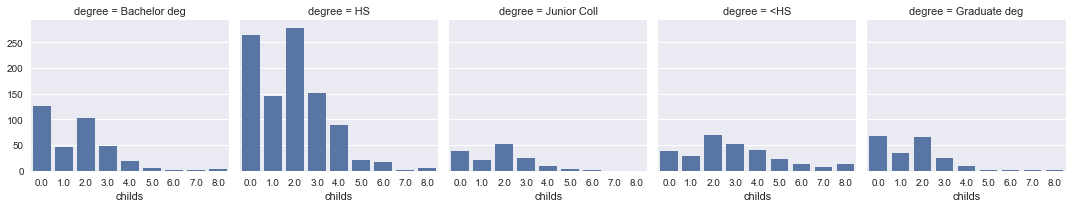

In [16]:

degree_child_df = sns.FacetGrid(df, col = 'degree')

degree_child_plt = degree_child_df.map(sns.countplot, "childs")

degree_child_plt

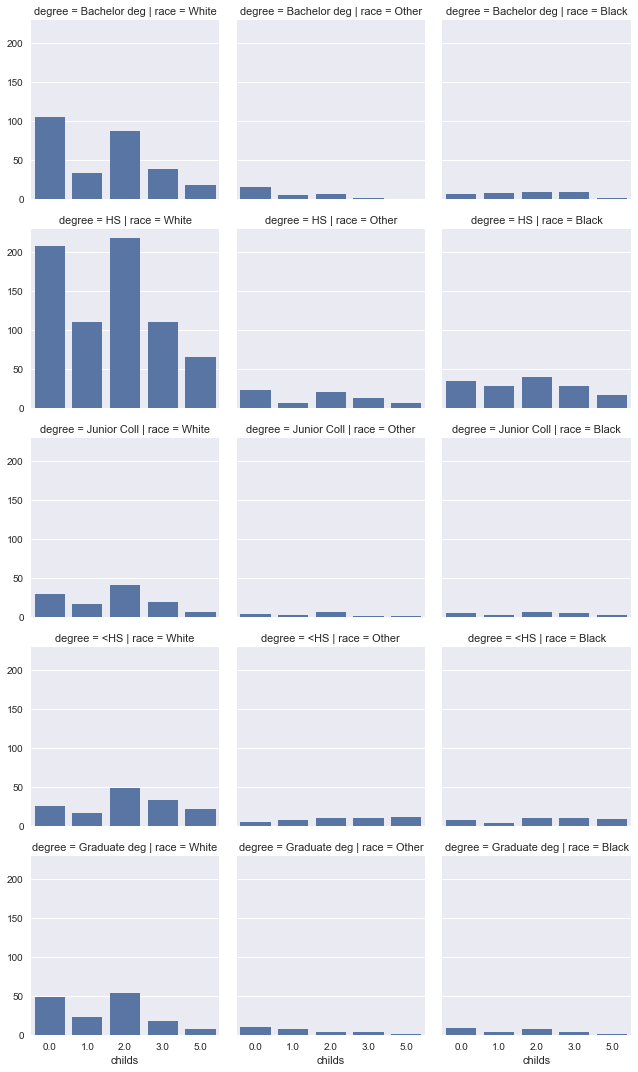

In [17]:
degree_child_df = sns.FacetGrid(df, col = 'race', row = 'degree')

degree_child_plt = degree_child_df.map(sns.countplot, "childs")

degree_child_plt

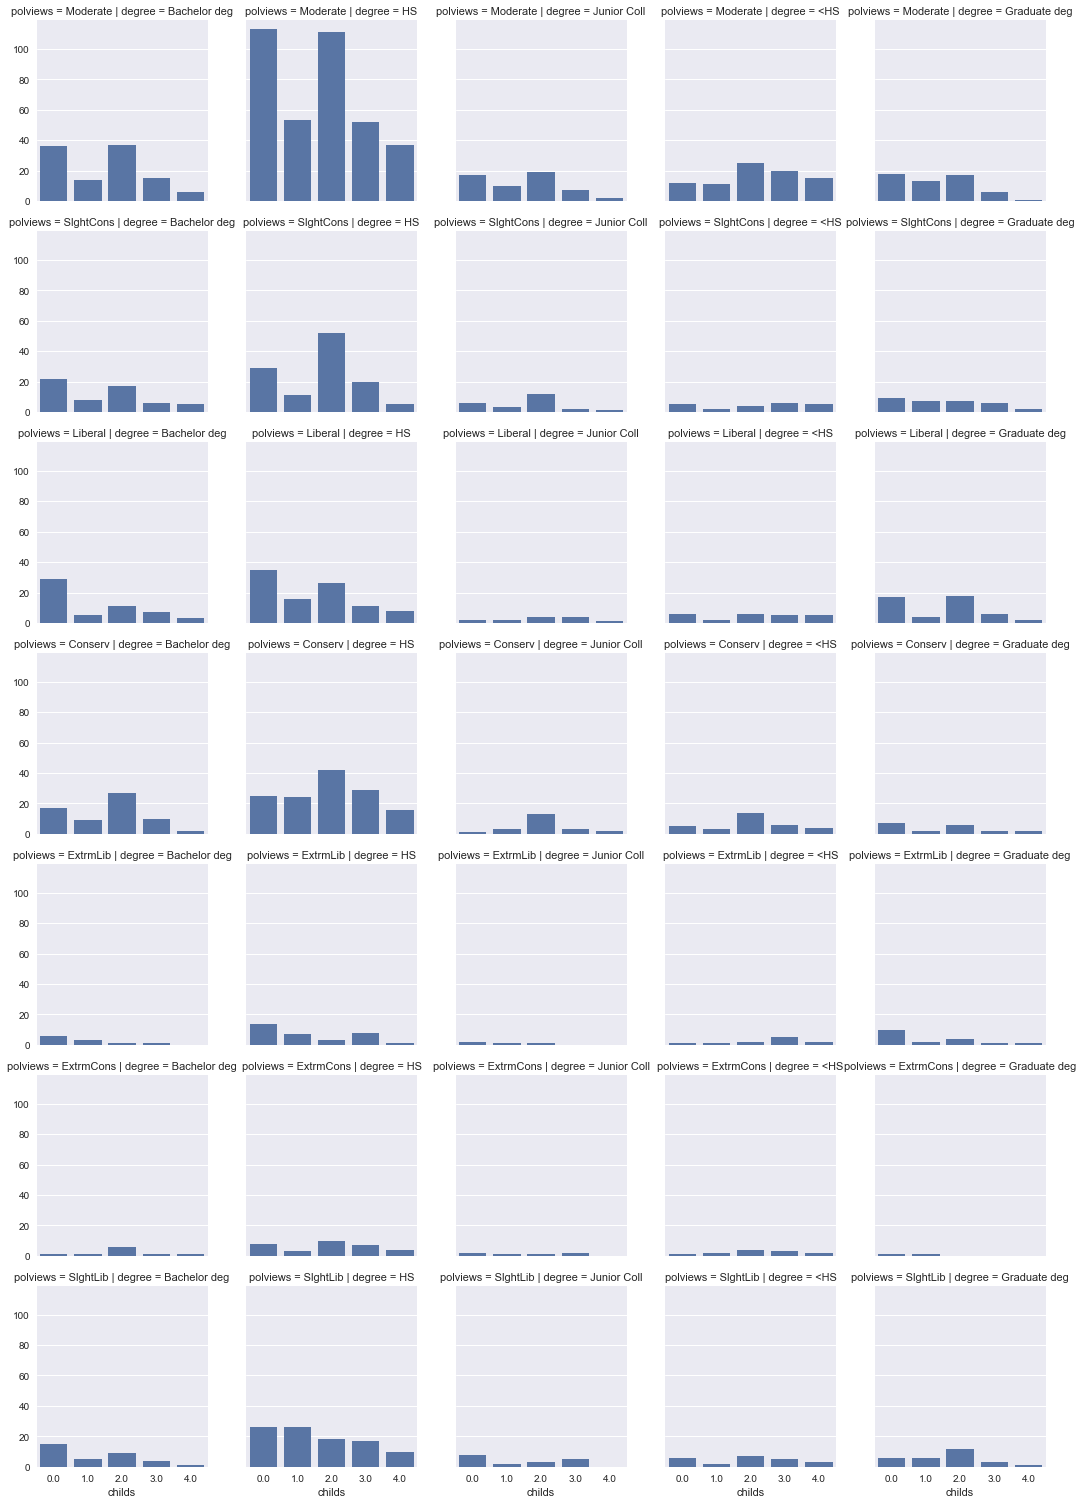

In [18]:
region_child = sns.FacetGrid(df, col = 'degree', row = 'polviews')

region_child_plt = region_child.map(sns.countplot, "childs")

region_child_plt

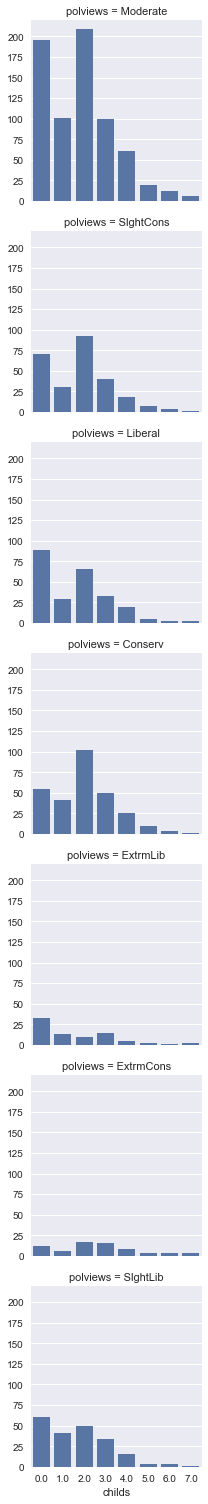

In [72]:
region_child = sns.FacetGrid(df, row = "polviews")
region_child_plt = region_child.map(sns.countplot, "childs")



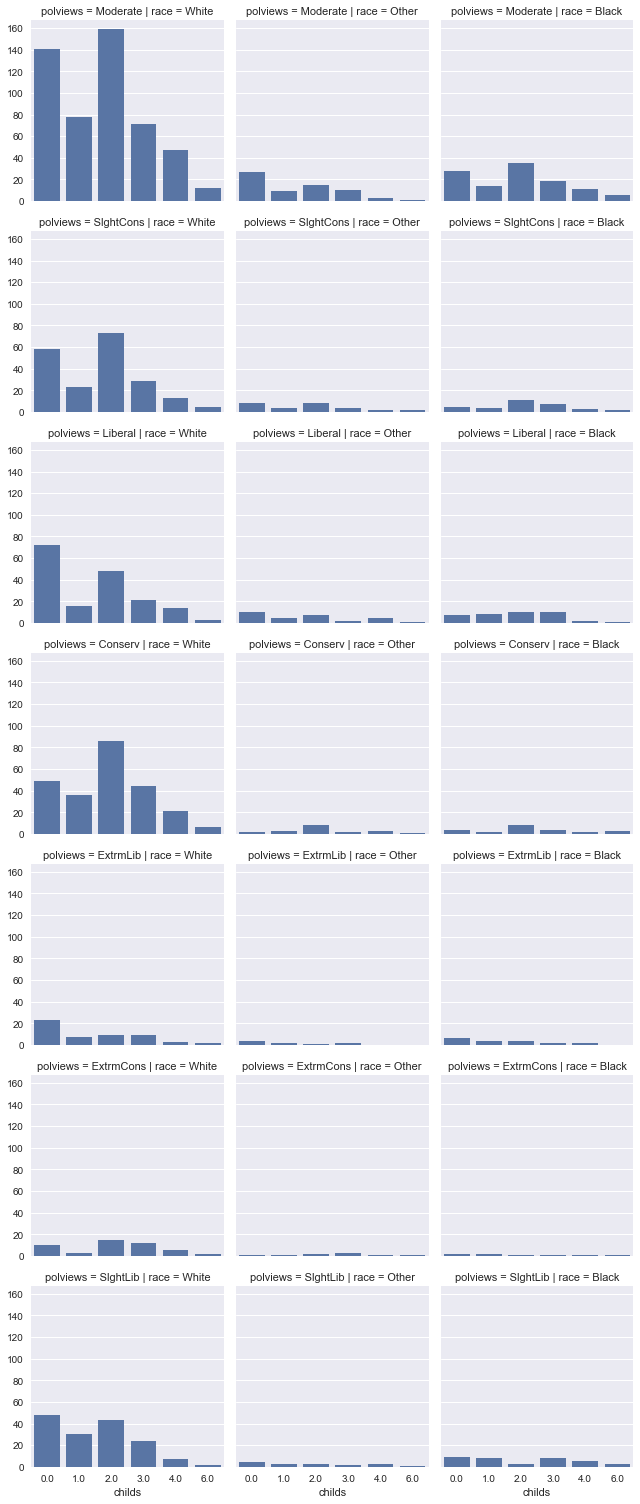

In [81]:
region_child = sns.FacetGrid(df, col = 'race', row = "polviews")

region_child_plt = region_child.map(sns.countplot, "childs")

region_child_plt

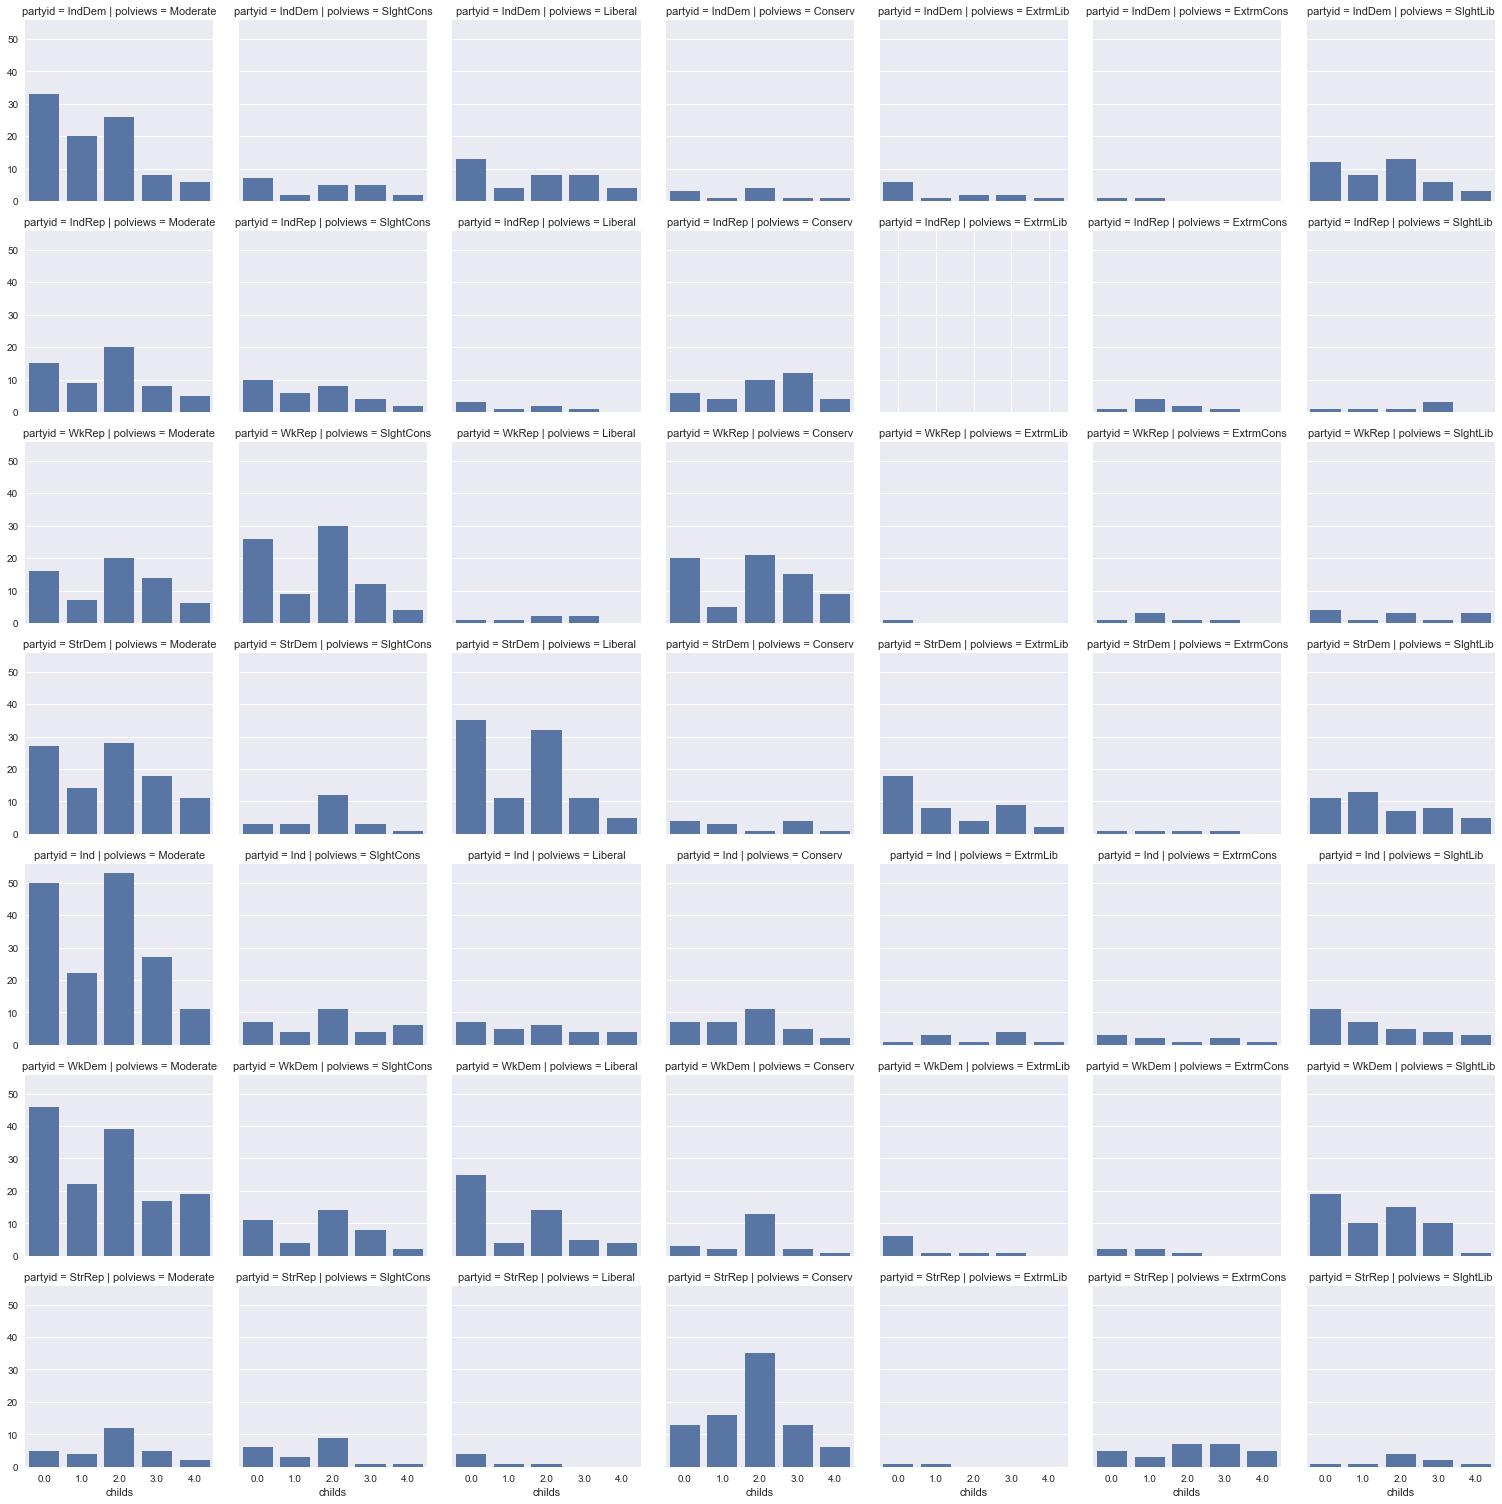

In [19]:
region_child = sns.FacetGrid(df, col = 'polviews', row = "partyid")

region_child_plt = region_child.map(sns.countplot, "childs")

region_child_plt

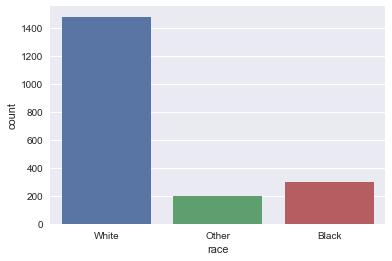

In [37]:
sns.countplot(x = 'race', data = df)

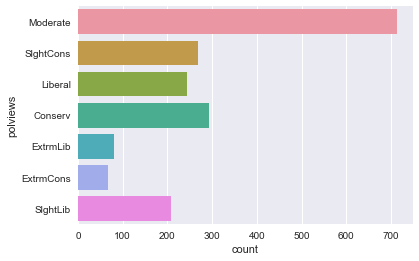

In [68]:
sns.countplot(y = "polviews", data = df)

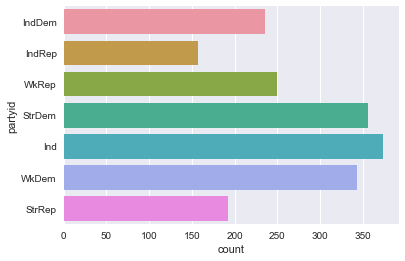

In [70]:
sns.countplot(y = "partyid", data = df)

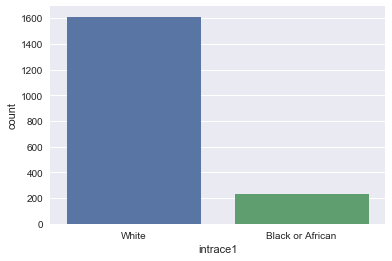

In [83]:
sns.countplot("intrace1", data =df)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

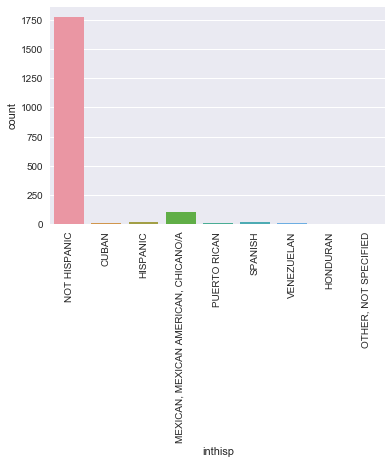

In [85]:
sns.countplot("inthisp", data = df)
plt.xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

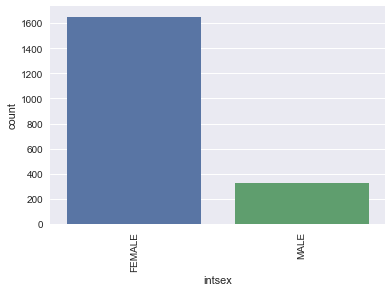

In [86]:
sns.countplot("intsex", data = df)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

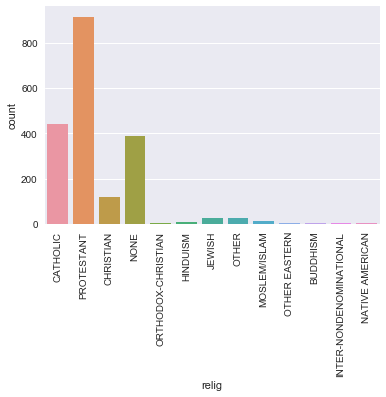

In [94]:
sns.countplot("relig", data=df)
plt.xticks(rotation = 90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

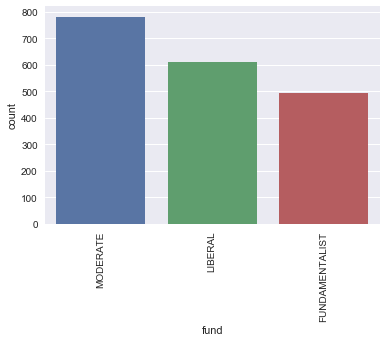

In [95]:
sns.countplot("fund", data=df)
plt.xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

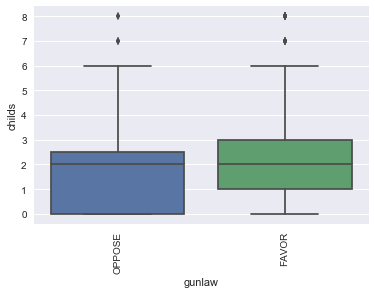

In [97]:
sns.boxplot(x = "gunlaw",
           y = 'childs',
           data = df)

plt.xticks(rotation = 90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

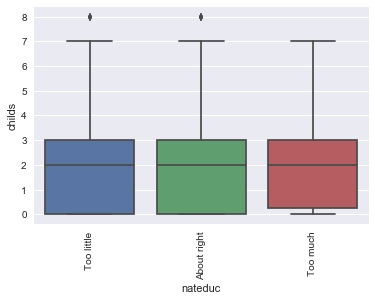

In [98]:
sns.boxplot(x = "nateduc",
           y = 'childs',
           data = df)

plt.xticks(rotation = 90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

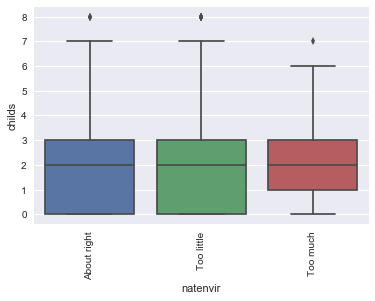

In [99]:
sns.boxplot(x = "natenvir",
           y = 'childs',
           data = df)

plt.xticks(rotation = 90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

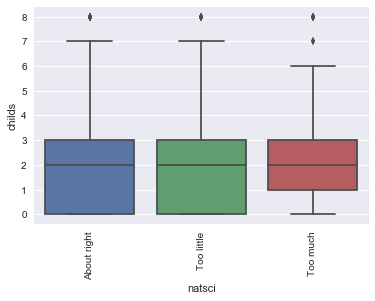

In [100]:
sns.boxplot(x = "natsci",
           y = 'childs',
           data = df)

plt.xticks(rotation = 90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

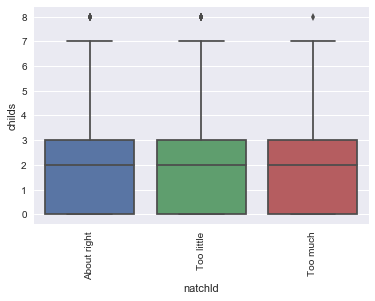

In [101]:
sns.boxplot(x = "natchld",
           y = 'childs',
           data = df)

plt.xticks(rotation = 90)

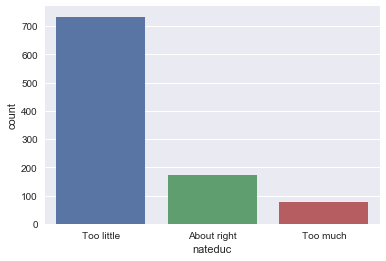

In [102]:
sns.countplot("nateduc", data =df)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

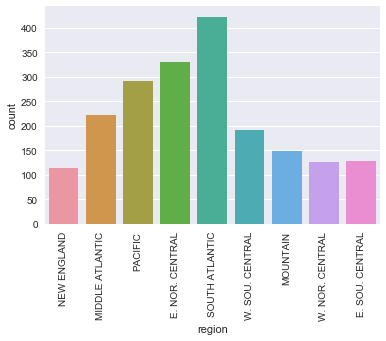

In [105]:
sns.countplot("region", data = df)
plt.xticks(rotation = 90)

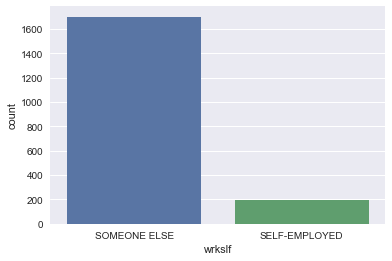

In [106]:
sns.countplot("wrkslf", data = df)

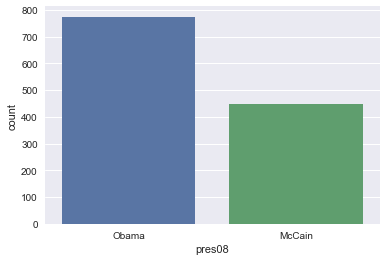

In [115]:
sns.countplot("pres08", data = df)

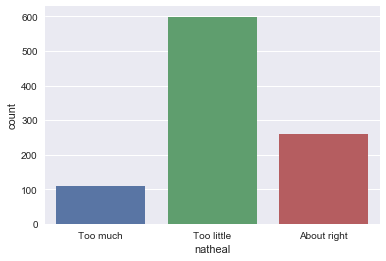

In [116]:
sns.countplot("natheal", data = df)